## How to EDA?

The EDA (Exploratory Data Analysis) is the phase of solving a data problem that comes right after the data processing and cleaning, and it is the first one that involves some degree of basic statistical analysis.

To learn the basics of an EDA, we need first and foremost some raw data that we can work with and analyse.
Taking also into account that this is a beginner tutorial, we will use the **IMDb top 1000 rated movies dataset**, as it is a fairly clean dataset whilst still having some things we can work on.

So, the first thing you need to do is find this dataset (a good option is Kaggle) and download it, then, for the links on this code to work, you should store it in a folder called *datasets*, right next to the folder where your code will be. If you download the whole repository, it will work just fine.

We will begin our EDA by importing the necessary libraries and loading the dataset.

In [ ]:
# To be able to load the libraires, first we need to have them installed in our environment
# If you haven't installed them yet, you can do so using pip in the cmd:
# pip install pandas numpy matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# We use a relative path so that it works on any machine as long as it has downloaded all the files
# The dataset is loaded as a pandas DataFrame so that we can easily manipulate it with the pandas functions
df = pd.read_csv("../datasets/imdb_top_1000.csv")

Now that we have all the tools we need to explore the data for now, we will start approaching the df by looking into its shape, columns and first entries. 

In [3]:
# The three functions used here belong to the pandas library
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:")
display(df.head(5))

Shape of dataset: (1000, 16)

Columns:
 Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

First 5 rows:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Continuing with the EDA we perform now our first analysis of the df.

In [4]:
# First we take a more general look at the df
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


We can see the different data types of each column, which we will need to take into account for further processing.

We can also see that there are some null (NaN) values in the "Meta score", "Certificate" and "Gross" columns, which is something that we will need to treat for further analysis.

Now, we perform a basic descriptive statistics analysis of the df.

In [5]:
print("\nSummary statistics:")
display(df.describe(include="all"))


Summary statistics:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMTY5OD...,Drishyam,2014,U,100 min,Drama,NaN,A man in London tries to help a counter-espion...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


Let's slow down for a bit here, because we have found some issues.

Before anything, there is no need to be scared about all the NaN values outputted by the descriptive statistics analysis, it makes sense that columns with categorical data don't have a mean.


But the Gross column, apart from having NaN values (which is an issue we will take care of later), is an object type column, despite containing numbers in a continuous scale. We can fix this simply  by changing it's data type. The same thing happens with the Runtime column.

Python has detected the column Gross as an object type due to the numbers in it being separated by commas, before converting to int64 we need to remove them.

df['Gross'] = df['Gross'].str.replace(',', '').astype(int)

We will see that this method gives us an error, that is because of the NaN values. NaN values are float type and they can't be converted using the .astype(int) method.

There are many, many, many ways to solve this. The one that I choose is to use the Int64 pandas data type, which supports NaN values. Alternatively, we could convert the entire column to float64, although this method would make us lose precision with very large numbers.

In [6]:
df['Gross'] = df['Gross'].str.replace(',', '').astype('Int64')
# We do the same for the Runtime column, removing the ' min' string and converting to int64
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype('Int64')

# We can check if the data types changed correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   Int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    Int64  
dtypes: Int64(2), float64(2), int64(1), object(11)
memory usage: 127.1+ KB


Another thing we could see is that the columns with either float64 (decimal numbers) or int64 (whole numbers) data types don't have a top value or unique values, this is due to the data in those columns having a continuous scale.

When we used the describe() function earlier, we specifically asked for it to include "all" statistics (categorical and numerical), that is why the columns have values for only one of those types of statistics. 

Now that we have made sense of the different data types of each column and their statistics, it is finally time to work on the missing values (also called NaN or null).

First we will check how many do we have per column

In [7]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


The way of treating missing values on a dataset depends on a lot of things, but our first option is always to try and understand why they are there. This involves revisiting the data collection process and understanding how it works.

We do this because the reason for there to be missing entries could go from unwillingness from the interviewed to an error in the data base. The nature of these depends a lot on how the data was obtained (questionnaires, user activity, company process records, ...).

In our specific case we do not have access to any type of information about how IMDb treated this data internally, so we will continue without taking this into consideration, but that might be costing us some valuable insights on why that particular information is not there.

Based on what we find out on the previous step, we now need to decide what do we do with all those incomplete rows. 

In the case of the missing Gross column entries, we could look that information up and manually include it on our df, and maybe that is also a viable option with the Certificate and Meta score columns by going into the IMDb page itself looking for it, other options include filling with the average. Take into account that we always have to be very careful about introducing new data into our df as if it's not faithful we will be distorting all further analysis that we conduct.

However, that might take some time, and thus money, so another option we have to consider is to simply leave them there, that way we won't lose any information (including the one those missing entries being missing provide, as it could not be random). But it will come at the cost of many functions failing or droping the rows with missing entries either way, and we won't be able to train models with our data.

The last option is to drop all the rows that contain missing values, and this option has pretty much the opposite pros and cons of leaving them there.

For this tutorial, and the extent to which it goes, I decided to go with the second option and leave the missing entries there.

For the few final steps of our EDA, we will look at the shape of the distributions of the numeric columns

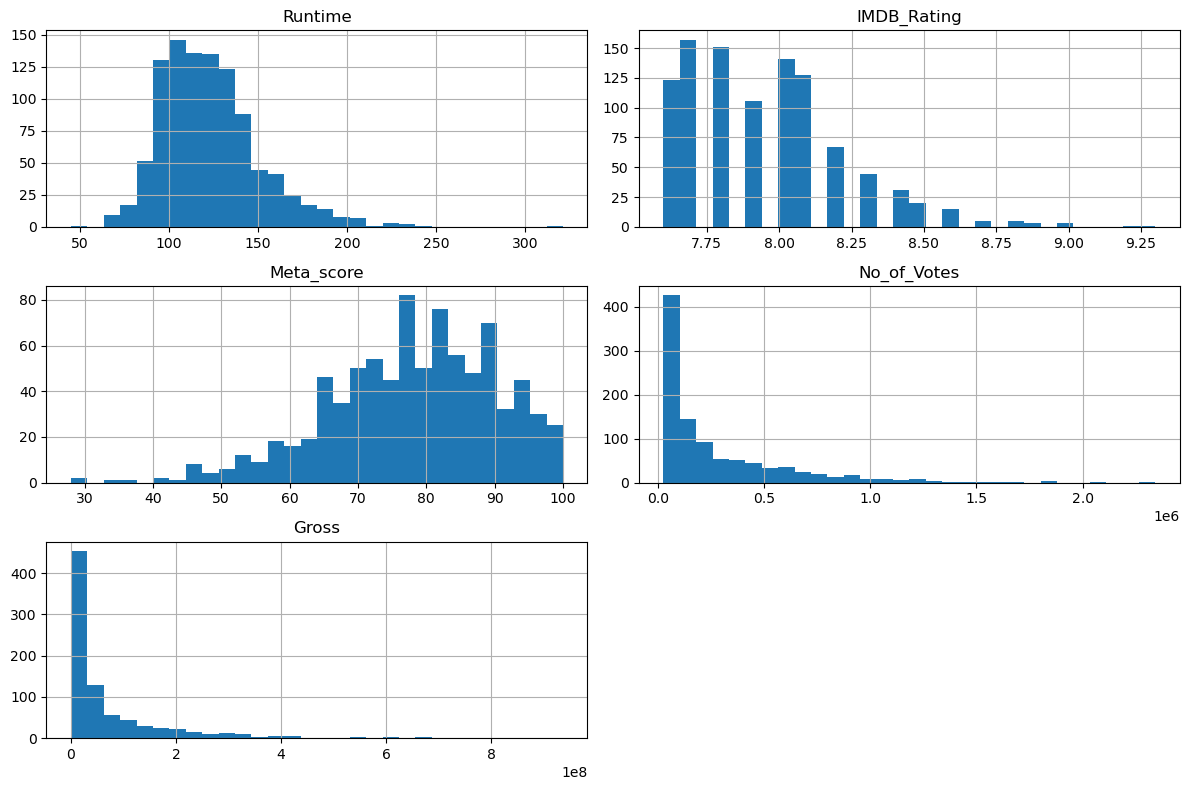

In [ ]:
# this pandas function automatically detects which columns of the df are numerical
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


We can see that some of the distributions are a bit off-centered and others are way off-centered, for more advanced techniques like PCA, MANCOVA, etc we would have to standardize them, but that is beyond the level of this tutorial.

Finally, we will create a correlation matrix heatmap to see the correlation between the numerical columns, that is, the ammount of information that a pair of columns share or is redundant.

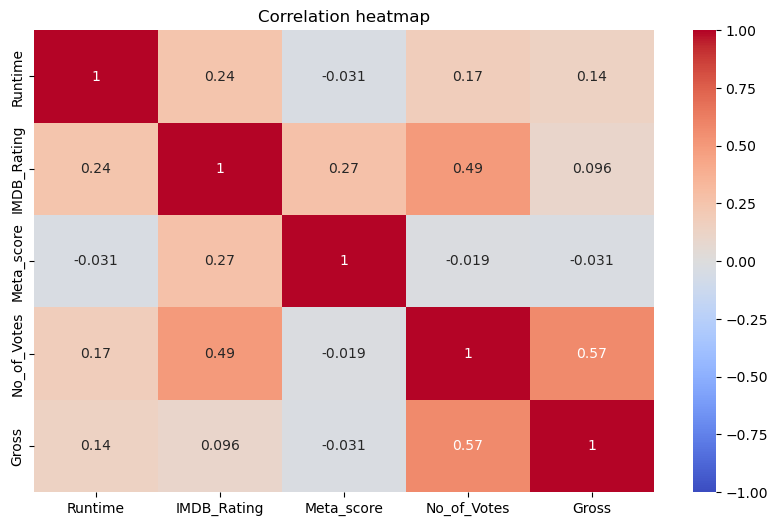

In [12]:
plt.figure(figsize=(10,6))
# for this seaborn function we do need to specify we only want the numerical columns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmax=1, vmin=-1)
plt.title("Correlation heatmap")
plt.show()

We can see that the Number of votes and Gross columns have some correlation, but in general there are no strong correlations in our df, that means that techniques that reduce the number of dimensions of our data will not be of much use, but again, that is beyond the scope of this tutorial.

The end.